In [36]:
import time
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np

import ephem

#file_path = r'/Users/orabe/Hetzner/Social-Interaction/PhenoSoft_control/Sample-21.12.09-Thermo-copy.csv'
file_path = r"X:\Social-Interaction\PhenoSoft_control\Sample-21.12.09-Thermo - Copy.csv"

df = pd.read_csv(file_path, sep=';', encoding='UTF-16LE')
df.head(10)

,DateTime,IdRFID,IdLabel,unitLabel,eventDuration,sense1duration,sense1Events,senseRFIDrecords,outFuncLabel,outLabel,SystemMsg,MsgValue1,MsgValue2,MsgValue3
0,#ID-Device,R1.1,48,33,0.0,SAM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,#ID-Device,R1.2,73,33,0.0,SAM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,#ID-Device,R1.3,99,33,0.0,SAM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,#ID-Device,R1.4,124,33,0.0,SAM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,#ID-Device,R2.1,48,68,0.0,SAM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,#ID-Device,R2.2,73,68,0.0,SAM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,#ID-Device,R2.3,99,68,0.0,SAM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,#ID-Device,R2.4,124,68,0.0,SAM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,"44539,5015003588",NaN,NaN,Control,NaN,NaN,NaN,NaN,NaN,NaN,start,ThermoConfig.xlsx,NaN,NaN
9,"44539,5015282407",041917C16C,unknown,R1.1,134.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df_coords = df[df['DateTime'] == '#ID-Device'] 
df_coords = df_coords[['IdRFID', 'IdLabel', 'unitLabel']]

df_coords[['IdLabel', 'unitLabel']] = df_coords[['IdLabel', 'unitLabel']].astype(int)

df_thermo_coords = df_coords

df_coords
# df_coords = df[df['DateTime'] == '#ID-Device']
# df_coords= df_coords[['IdRFID', 'IdLabel', 'unitLabel']]
# df = df[df['DateTime'] != '#ID-Device']

,IdRFID,IdLabel,unitLabel
0,R1.1,48,33
1,R1.2,73,33
2,R1.3,99,33
3,R1.4,124,33
4,R2.1,48,68
5,R2.2,73,68
6,R2.3,99,68
7,R2.4,124,68


In [9]:
df_thermo_coords.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 0 to 7
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   IdRFID     8 non-null      object
 1   IdLabel    8 non-null      int32 
 2   unitLabel  8 non-null      int32 
dtypes: int32(2), object(1)
memory usage: 192.0+ bytes


In [ ]:
def dj_to_unix_timestamps_conversion(rfid_ts):
    unix_start_ts = dt.datetime(year=1970, month=1, day=1, hour=0)
    dublin_jd_start_ts = dt.datetime(year=1899, month=12, day=31, hour=12)
    unix_dublin_jd_diff = unix_start_ts - dublin_jd_start_ts
    rfid_ts_in_sec *= 60 * 60 * 24

    rfid_ts_as_unix = rfid_ts_in_sec - unix_dublin_jd_diff.total_seconds()

    dt.datetime.fromtimestamp(rfid_ts_as_unix)

In [21]:
df = df[df['DateTime'] != '#ID-Device']
df_thermo = df_thermo[df_thermo['DateTime'] != '#ID-Device']

df_thermo['DateTime'] = df_thermo['DateTime'].replace(",", ".", regex=True)
#df_thermo['DateTime'] = df_thermo['DateTime'].apply(lambda x: time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(float(x))))
#df_thermo['DateTime'] = df_thermo['DateTime'].apply(calc_time)
df_thermo['DateTime'] = df_thermo['DateTime'].apply(lambda x: ephem.Date(float(x) - ephem.hour))


df['DateTime'] = df['DateTime'].replace(",", ".", regex=True)
# #df_thermo['DateTime'] = df_thermo['DateTime'].apply(lambda x: time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(float(x))))
# #df['DateTime'] = df['DateTime'].apply(calc_time)
df['DateTime'] = df['DateTime'].apply(lambda x: ephem.Date(float(x) - ephem.hour))
print(ephem.Date(0))
df

1899/12/31 12:00:00


,DateTime,IdRFID,IdLabel,unitLabel,eventDuration,sense1duration,sense1Events,senseRFIDrecords,outFuncLabel,outLabel,SystemMsg,MsgValue1,MsgValue2,MsgValue3
8,44539.126500,NaN,NaN,Control,NaN,NaN,NaN,NaN,NaN,NaN,start,ThermoConfig.xlsx,NaN,NaN
9,44539.126528,041917C16C,unknown,R1.1,134.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
10,44539.126538,041917C16C,unknown,R2.1,1547.0,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN
11,44539.126567,041917C16C,unknown,R2.3,0.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
12,44539.126587,041917C16C,unknown,R2.4,0.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20365,44540.134140,041917923E,unknown,R1.2,0.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
20366,44540.134168,041917923E,unknown,R1.2,515.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
20367,44540.134186,041917923E,unknown,R1.2,0.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
20368,44540.134201,041917923E,unknown,R2.2,0.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
print(ephem.Date(44539.5015003588))

print(ephem.Date(44540.134215))

print(ephem.Date(0))
df.tail()

2021/12/11 00:02:10
2021/12/11 15:13:16
1899/12/31 12:00:00


,DateTime,IdRFID,IdLabel,unitLabel,eventDuration,sense1duration,sense1Events,senseRFIDrecords,outFuncLabel,outLabel,SystemMsg,MsgValue1,MsgValue2,MsgValue3
20365,"44540,5091401505",041917923E,unknown,R1.2,0.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
20366,"44540,509167963",041917923E,unknown,R1.2,515.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
20367,"44540,5091864352",041917923E,unknown,R1.2,0.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
20368,"44540,50920125",041917923E,unknown,R2.2,0.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
20369,"44540,5092149421",NaN,NaN,Control,NaN,NaN,NaN,NaN,NaN,NaN,end,NaN,NaN,NaN


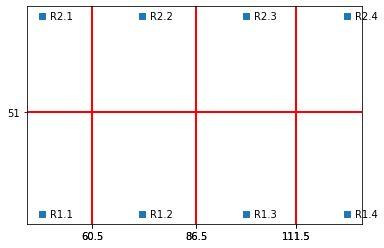

In [11]:
fig = plt.figure()
ax = fig.gca()

ax.set_xticks(df_thermo_coords.IdLabel - 25/2)
ax.set_yticks([34+34/2])

plt.scatter(x=df_thermo_coords.IdLabel, y=df_thermo_coords.unitLabel, marker='s')

for i, txt in enumerate(df_thermo_coords.IdRFID):
    ax.annotate(txt, (df_thermo_coords.IdLabel[i]+2, df_thermo_coords.unitLabel[i]-0.5))

plt.grid(color='r', linestyle='-', linewidth=2)
plt.show()


In [ ]:
x = 43565.4868009259
y = x - ephem.hour
#dublin_julian_day = datetime.utcnow()
#print(dublin_julian_day, type(dublin_julian_day))

#date_time_str = ephem.Date(dublin_julian_day)
x = ephem.Date(x)
y = ephem.Date(y)

print((x), type(x))
#print((date_time_str - ephem.hour), type(dublin_julian_day))
print((y), type(y))

In [ ]:
def calc_time(x):
    print(ephem.Date(float(x) - ephem.hour))

In [ ]:
def calc_time(x):
    print(f'a print inside cal_time: {ephem.Date(x)}')
    return (ephem.Date(x))

x = float(df['DateTime'][8])
print(f'x = {x}')

calc_time(x)
print(f'calc_time(x) = {x}')

z = calc_time(x)
print(f'z = {z}')